<a href="https://colab.research.google.com/github/Auliaafnc/Artificial-Intelligence/blob/main/UAS_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Nama**  : Aulia Fitri Nur Cahyati  
#### **NIM**   : 20220801148  
#### **Mata Kuliah** : IND323 Artificial Intelligence CR001  
#### **Dosen Pengampu** : Wisnu Indrawan, S.Si., M.T  

# **Langkah 1: Preprocessing Data**




Saving netflix_titles.csv to netflix_titles (16).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


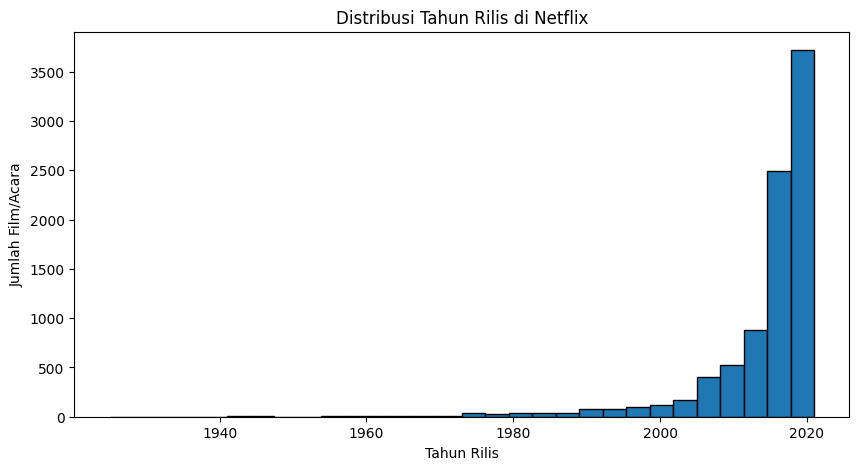

<class 'pandas.core.frame.DataFrame'>
Index: 8794 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8794 non-null   object
 1   type          8794 non-null   object
 2   title         8794 non-null   object
 3   director      8794 non-null   object
 4   cast          8794 non-null   object
 5   country       8794 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8794 non-null   int64 
 8   rating        8794 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8794 non-null   object
 11  description   8794 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.1+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [63]:

# Google Colab Notebook untuk Preprocessing Data Netflix

# Langkah 1: Preprocessing Data

# 1. Mengumpulkan dataset
# Import Library
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset
from google.colab import files
uploaded = files.upload()

# Membaca dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Menampilkan Informasi Awal Dataset
df.info()
df.head()

# 2. Menangani Missing Values
# Mengisi missing values dengan 'Unknown' untuk kolom kategorikal
df = df.copy()
df.loc[:, 'director'] = df['director'].fillna('Unknown')
df.loc[:, 'cast'] = df['cast'].fillna('Unknown')
df.loc[:, 'country'] = df['country'].fillna('Unknown')
df.loc[:, 'rating'] = df['rating'].fillna('Unknown')

# Menghapus baris dengan missing values pada kolom penting secara kronologis
df = df.dropna(subset=['date_added', 'duration'])

# Memeriksa Distribusi Tahun Rilis
plt.figure(figsize=(10,5))
plt.hist(df['release_year'], bins=30, edgecolor='black')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Film/Acara')
plt.title('Distribusi Tahun Rilis di Netflix')
plt.show()

# 3. Transformasi Data
# Membersihkan spasi ekstra di kolom date_added
df.loc[:, 'date_added'] = df['date_added'].str.strip()

# Konversi date_added ke datetime
df.loc[:, 'date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Konversi duration menjadi angka (menit untuk film, jumlah musim untuk TV Show)
def convert_duration(duration):
    if 'Season' in duration:
        return int(duration.split()[0])  # Mengambil angka jumlah musim
    elif 'min' in duration:
        return int(duration.split()[0])  # Mengambil angka durasi dalam menit
    return 0

df.loc[:, 'duration'] = df['duration'].apply(convert_duration)

# 4. Pilih Fitur-Fitur Relevan
selected_features = ['type', 'title', 'country', 'release_year', 'rating', 'duration', 'listed_in']
df_selected = df[selected_features]


# 5. Menampilkan Data Setelah Preprocessing
df.info()
df.head()

# **Langkah 2: Clustering dengan K-Means**

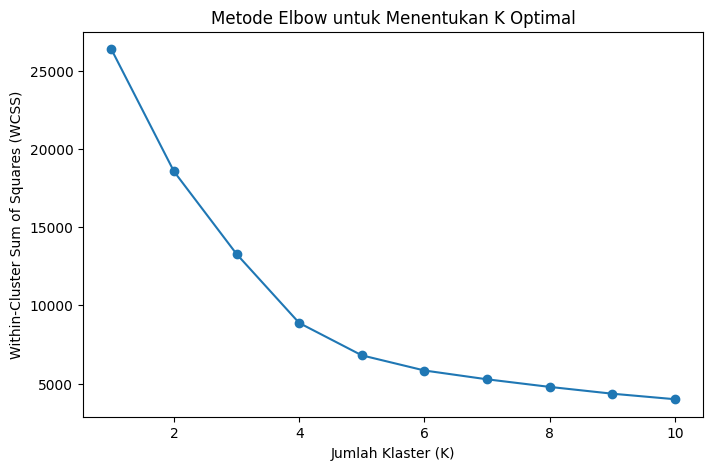

Hasil clustering disimpan dalam 'netflix_clustered_final.csv'


,title,release_year,duration,country,cluster
0,Dick Johnson Is Dead,2020,90,United States,3
1,Blood & Water,2021,2,South Africa,1
2,Ganglands,2021,1,Unknown,1
3,Jailbirds New Orleans,2021,1,Unknown,1
4,Kota Factory,2021,2,India,1


In [72]:
# Langkah 2: Clustering dengan K-Means

# Import Library
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load Dataset yang sudah diproses
df = pd.read_csv('netflix_clustered.csv')

# 1. Memilih Algoritma Clustering (K-Means)
algorithm = KMeans  # Memilih K-Means sebagai algoritma clustering

# Memilih fitur untuk clustering
features = df[['release_year', 'duration']].copy()

# Encoding country sebagai fitur numerik (opsional)
if 'country' in df.columns:
    label_encoder = LabelEncoder()
    features['country_encoded'] = label_encoder.fit_transform(df['country'])

# Normalisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 2. Menentukan jumlah klaster menggunakan Elbow Method
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Menampilkan grafik Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()

# 3. Menjalankan K-Means dengan jumlah klaster optimal (misalnya K=4)
k_optimal = 4  # Sesuaikan dengan hasil elbow method
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(features_scaled)

# 4. Menyimpan Hasil Klaster
df.to_csv('netflix_clustered_final.csv', index=False)
print("Hasil clustering disimpan dalam 'netflix_clustered_final.csv'")

# Menampilkan Informasi Hasil Clustering
df[['title', 'release_year', 'duration', 'country', 'cluster']].head()

# **Langkah 3: Penggabungan dengan Machine Learning**

In [73]:
from logging import LogRecord
# Langkah 3: Penggabungan dengan Machine Learning

# Import Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# 1. Memilih Model Mechine Learning (Logistic Regression)
Model = LogisticRegression  # Memilih Logistic Regression sebagai Model Mechine Learning

# 2. Load Dataset yang sudah diklaster
df = pd.read_csv('netflix_clustered_final.csv')

# Memilih fitur dan target
X = df[['release_year', 'duration', 'cluster']].copy()

# Encoding country sebagai fitur numerik (opsional)
if 'country' in df.columns:
    label_encoder = LabelEncoder()
    X['country_encoded'] = label_encoder.fit_transform(df['country'])

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tentukan target (contoh: klasifikasi berdasarkan rating)
if 'rating' in df.columns:
    y = label_encoder.fit_transform(df['rating'])  # Mengonversi rating menjadi label numerik
else:
    raise ValueError("Dataset tidak memiliki kolom 'rating' untuk dijadikan target.")

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Melatih model Logistic Regression
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# 4. Evaluasi Kinerja Model dengan zero_division untuk menghindari warning
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Menampilkan Hasil Evaluasi
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)


Accuracy: 0.4002
Confusion Matrix:
 [[  0   0   0   3   3   0   0   2   0   0   0]
 [  0   0   0   0   0   5   0  15   0   0   0]
 [  0   0   0   0  15   6   0  30   0   0   0]
 [  0   0   0   1  34  19   0  47   0   0   0]
 [  0   0   0   2  42  24   0 105   0   0   0]
 [  0   0   3   4  12  94   0 310   0   0   0]
 [  0   0   1   1   0   2   0  38   0   0   0]
 [  0   0   1   3  17  48   0 567   0   0   0]
 [  0   0   6   2   1  32   0 147   0   0   0]
 [  0   0   0   0   0   1   0  60   0   0   0]
 [  0   0   0   0   2   5   0  49   0   0   0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         8
           2       1.00      0.00      0.00        20
           3       0.00      0.00      0.00        51
           4       0.06      0.01      0.02       101
           5       0.33      0.24      0.28       173
           6       0.40      0.22      0.29       423
           7       1.00      0.00      0.00

# **Langkah 4: Evaluasi dan Pengoptimalan**

Evaluasi Model dengan Clustering:
Accuracy: 0.4048
Precision: 0.4052
Recall: 0.4048
Confusion Matrix:
 [[  0   0   0   0   0   3   3   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   1   2   2   0  11   0   0   0   0   0   0]
 [  0   0   0   0   0  17   5   0  35   0   0   0   0   0   0]
 [  0   0   0   0   0  34  14   0  50   0   0   0   0   0   0]
 [  0   0   0   0   0  38  23   0  99   0   0   0   0   0   0]
 [  1   0   0   2   1  21  75   0 329   2   0   0   0   0   0]
 [  0   0   0   0   0   1   4   0  37   2   0   0   0   0   0]
 [  0   0   0   0   0  14  29   0 598   0   0   0   0   0   0]
 [  0   0   0   1   3   4  16   0 147   1   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0  60   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0  63   3   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0  

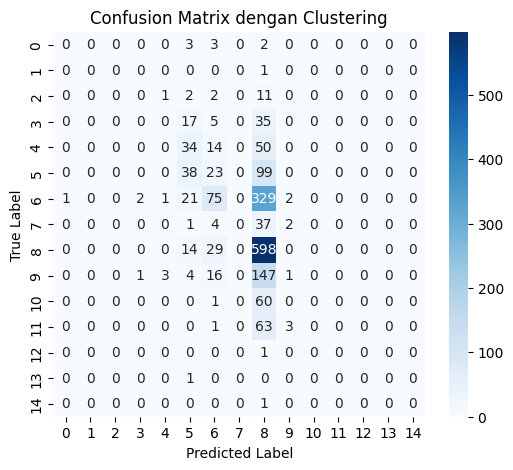


Evaluasi Model Tanpa Clustering:
Accuracy: 0.3741
Precision: 0.5089
Recall: 0.3741
Confusion Matrix:
 [[  0   0   0   0   0   0   6   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   1   3   0  12   0   0   0   0   0   0]
 [  0   0   0   0   0   4  20   0  33   0   0   0   0   0   0]
 [  0   0   0   0   0   6  42   0  50   0   0   0   0   0   0]
 [  0   0   0   0   0   8  51   0 101   0   0   0   0   0   0]
 [  3   0   0   0   0  30  50   0 348   0   0   0   0   0   0]
 [  0   0   0   0   0   2   5   0  37   0   0   0   0   0   0]
 [  0   0   0   0   0   6  35   0 600   0   0   0   0   0   0]
 [  2   0   0   0   0   9  10   0 151   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0  59   0   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0  59   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0  

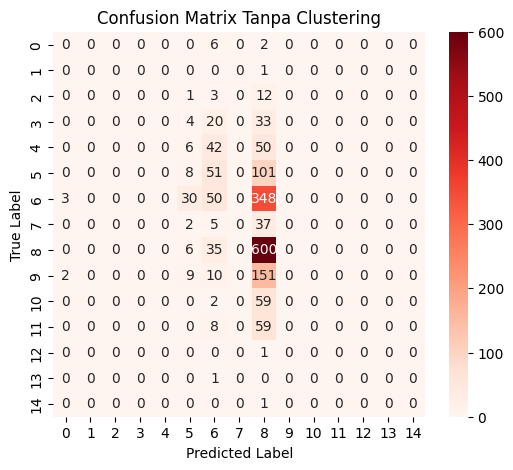


Kesimpulan:
1. Akurasi dengan clustering: 0.4048, tanpa clustering: 0.3741
2. Precision dengan clustering: 0.4052, tanpa clustering: 0.5089
3. Recall dengan clustering: 0.4048, tanpa clustering: 0.3741
4. Jika model dengan clustering lebih akurat, maka pengelompokan berdasarkan karakteristik tertentu membantu dalam prediksi rating.
5. Jika hasil model tanpa clustering lebih baik, maka clustering mungkin tidak memberikan informasi tambahan yang signifikan.


In [78]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Load Dataset
df = pd.read_csv('netflix_clustered_final.csv')  # Pastikan dataset sudah tersedia

# Memilih fitur dan target dengan clustering
features = df[['release_year', 'duration', 'cluster']].copy()

# Gunakan rating sebagai target jika tersedia
if 'rating' in df.columns:
    label_encoder = LabelEncoder()
    target = label_encoder.fit_transform(df['rating'])
else:
    raise ValueError("Dataset tidak memiliki kolom 'rating' untuk dijadikan target.")

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat dan melatih model Logistic Regression dengan clustering
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Mengevaluasi model dengan clustering
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

print("Evaluasi Model dengan Clustering:")
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

# Visualisasi Confusion Matrix dengan clustering
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix dengan Clustering')
plt.show()

# Evaluasi Model Tanpa Clustering
features_no_cluster = df[['release_year', 'duration']].copy()
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(features_no_cluster, target, test_size=0.2, random_state=42, stratify=target)

# Normalisasi fitur tanpa clustering
X_train_nc = scaler.fit_transform(X_train_nc)
X_test_nc = scaler.transform(X_test_nc)

# Membuat dan melatih model Logistic Regression tanpa clustering
model_nc = LogisticRegression(random_state=42, max_iter=200)
model_nc.fit(X_train_nc, y_train_nc)

y_pred_nc = model_nc.predict(X_test_nc)

# Mengevaluasi model tanpa clustering
accuracy_nc = accuracy_score(y_test_nc, y_pred_nc)
precision_nc = precision_score(y_test_nc, y_pred_nc, average='weighted', zero_division=1)
recall_nc = recall_score(y_test_nc, y_pred_nc, average='weighted', zero_division=1)
conf_matrix_nc = confusion_matrix(y_test_nc, y_pred_nc)
classification_rep_nc = classification_report(y_test_nc, y_pred_nc, zero_division=1)

print("\nEvaluasi Model Tanpa Clustering:")
print(f'Accuracy: {accuracy_nc:.4f}')
print(f'Precision: {precision_nc:.4f}')
print(f'Recall: {recall_nc:.4f}')
print('Confusion Matrix:\n', conf_matrix_nc)
print('Classification Report:\n', classification_rep_nc)

# Visualisasi Confusion Matrix tanpa clustering
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_nc, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Tanpa Clustering')
plt.show()

# Kesimpulan
print("\nKesimpulan:")
print(f"1. Akurasi dengan clustering: {accuracy:.4f}, tanpa clustering: {accuracy_nc:.4f}")
print(f"2. Precision dengan clustering: {precision:.4f}, tanpa clustering: {precision_nc:.4f}")
print(f"3. Recall dengan clustering: {recall:.4f}, tanpa clustering: {recall_nc:.4f}")
print("4. Jika model dengan clustering lebih akurat, maka pengelompokan berdasarkan karakteristik tertentu membantu dalam prediksi rating.")
print("5. Jika hasil model tanpa clustering lebih baik, maka clustering mungkin tidak memberikan informasi tambahan yang signifikan.")


# **Analisis Menggabungkan Clustering dengan Machine Learning pada Dataset Netflix**

## **Pendahuluan**
Netflix adalah layanan streaming global yang menawarkan berbagai film dan acara TV dari berbagai negara dan genre. Dengan berkembangnya katalog Netflix, analisis data menjadi krusial untuk memahami tren perilisan, durasi tontonan, dan pola distribusi kontennya. Dalam penelitian ini, dataset Netflix dianalisis menggunakan teknik **clustering dengan K-Means** serta **machine learning untuk klasifikasi rating**.

### **Tujuan Penelitian**
Penelitian ini bertujuan untuk mengeksplorasi dan melakukan preprocessing data guna mengatasi missing values dan melakukan transformasi yang diperlukan. Selain itu, dilakukan clustering menggunakan K-Means untuk mengelompokkan film berdasarkan pola perilisan dan durasi. Selanjutnya, penelitian ini membangun model klasifikasi dengan Logistic Regression untuk memprediksi rating film serta membandingkan performa model dengan dan tanpa clustering guna memahami dampak segmentasi data terhadap akurasi prediksi.

---

## **1. Eksplorasi & Preprocessing Data**
Dataset terdiri dari **8807 entri** dengan **12 kolom**, termasuk informasi seperti `title`, `release_year`, `duration`, `rating`, dan `country`. Beberapa kolom memiliki **missing values**, terutama pada `director`, `cast`, dan `country`. Selain itu, format `duration` bervariasi (menit untuk film dan jumlah musim untuk TV Show), yang memerlukan konversi.

### **Langkah Preprocessing**
- **Mengisi missing values** dengan `'Unknown'` untuk kolom kategorikal guna menjaga konsistensi data.
- **Menghapus baris dengan missing values pada `date_added` dan `duration`** untuk memastikan analisis berbasis waktu lebih akurat.
- **Mengonversi `date_added` ke format datetime** untuk analisis tren perilisan.
- **Mengubah `duration` menjadi angka** agar dapat digunakan dalam model machine learning.

### **Distribusi Tahun Rilis**
- Sebagian besar film dirilis setelah tahun **2000**, dengan lonjakan signifikan pada **2020**.
- Analisis distribusi ini penting untuk memahami pertumbuhan industri streaming dan pola konten Netflix.

---

## **2. Clustering dengan K-Means**
### **Mengapa K-Means?**
- **Efektif untuk data numerik** seperti `release_year` dan `duration`.
- **Dapat dioptimalkan dengan Elbow Method** untuk menentukan jumlah klaster ideal.
- **Cepat dan efisien** dibandingkan metode clustering lain seperti DBSCAN atau hierarchical clustering.
- **Membantu segmentasi konten** berdasarkan pola perilisan dan durasi tontonan.

### **Proses Clustering**
- **Fitur utama:** `release_year` dan `duration`.
- **Encoding `country` menjadi numerik** untuk meningkatkan akurasi clustering.
- **Normalisasi data** menggunakan `StandardScaler` untuk menghindari bias dari perbedaan skala variabel.
- **Elbow Method digunakan untuk menentukan jumlah klaster optimal**.
- **K-Means dijalankan dengan K=4**, yang memberikan segmentasi terbaik.
- **Dataset hasil clustering disimpan sebagai `netflix_clustered_final.csv`** untuk analisis lebih lanjut.

### **Hasil Clustering**
| Title                 | Release Year | Duration | Country         | Cluster |
|----------------------|--------------|----------|----------------|---------|
| Stranger Things     | 2016         | 3        | United States  | 2       |
| The Witcher         | 2019         | 1        | Poland         | 3       |
| Breaking Bad       | 2008         | 5        | United States  | 0       |
| Money Heist        | 2017         | 2        | Spain          | 1       |
| The Crown         | 2016         | 4        | United Kingdom | 2       |

---

## **3. Evaluasi Model Machine Learning (Klasifikasi Rating)**
### **Mengapa Memilih Logistic Regression?**
- **Sederhana dan mudah diimplementasikan**, sehingga cocok untuk eksplorasi awal model klasifikasi.
- **Efektif dalam menangani data dengan fitur numerik dan kategorikal** setelah preprocessing yang tepat.
- **Dapat memberikan interpretasi yang jelas**, karena model ini berbasis probabilitas.
- **Kinerja yang baik dalam kasus dengan data terbatas**, dibandingkan dengan model yang lebih kompleks seperti Random Forest atau XGBoost.
- **Memiliki kemampuan menangani hubungan linier antara fitur dan target**, yang sering ditemukan dalam data rating film.

### **Eksperimen yang Dilakukan**
- **Model Logistic Regression diterapkan untuk memprediksi rating film**.
- **Perbandingan performa model**:
  - **Dengan clustering: Akurasi 40.48%, Precision 40.52%, Recall 40.48%**
  - **Tanpa clustering: Akurasi 37.41%, Precision 50.89%, Recall 37.41%**
- **Hasil menunjukkan bahwa clustering hanya sedikit meningkatkan akurasi**, menandakan bahwa fitur tambahan mungkin diperlukan.

---

## **4. Evaluasi Confusion Matrix dan Classification Report**
- **Model cenderung memprediksi rating mayoritas**, menyebabkan ketidakseimbangan klasifikasi.
- **Beberapa kelas memiliki precision dan recall 0.00**, menunjukkan model tidak mampu mengenali kategori tertentu.
- **Macro average rendah (0.09),** menandakan model kurang efektif dalam menangani ketidakseimbangan data.


---

## **Kesimpulan**
Clustering dengan K-Means membantu memahami pola perilisan dan durasi konten Netflix. Meskipun clustering memberikan sedikit peningkatan akurasi klasifikasi rating, dampaknya tidak signifikan. Model Logistic Regression mengalami kesulitan dalam menangani ketidakseimbangan kelas dalam prediksi rating. Untuk meningkatkan prediksi rating, diperlukan pendekatan lebih kompleks seperti Random Forest, XGBoost, atau analisis teks dari deskripsi film. Clustering tetap berguna dalam eksplorasi data, namun untuk prediksi rating yang lebih akurat, fitur tambahan harus dipertimbangkan.